In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

import matplotlib.pyplot as plt

tf.config.list_physical_devices("GPU")

PATH = os.getcwd()
IMG_SIZE = (160, 160)


def get_val_dataset():
    validation_dir = os.path.join(PATH, "./test")
    validation_dataset = image_dataset_from_directory(
        validation_dir, shuffle=True, batch_size=203, image_size=IMG_SIZE
    )
    val_batches = tf.data.experimental.cardinality(validation_dataset)
    test_dataset = validation_dataset.take(val_batches // 5)
    validation_dataset = validation_dataset.skip(val_batches // 5)

    print(
        "Number of validation batches: %d"
        % tf.data.experimental.cardinality(validation_dataset)
    )
    AUTOTUNE = tf.data.AUTOTUNE
    validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
    return validation_dataset

In [2]:
model = tf.keras.models.load_model("./EfficientNetB0_batch32.tf")
validation_dataset_prefetch = get_val_dataset()
loss, accuracy = model.evaluate(validation_dataset_prefetch)
print("Test accuracy :", accuracy)

Found 203 files belonging to 2 classes.
Number of validation batches: 1
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 5s 5s/step - loss: 0.6097 - accuracy: 0.6798
Test accuracy : 0.6798029541969299


Found 203 files belonging to 2 classes.
0


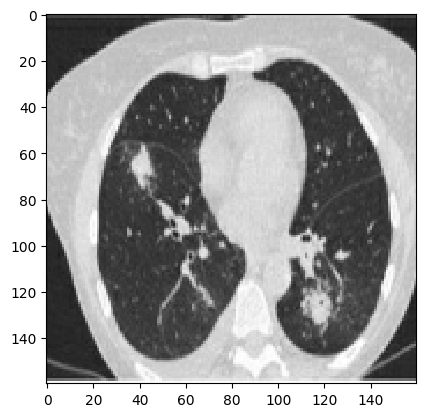

In [3]:
validation_dir = os.path.join(PATH, "./test")
validation_dataset = image_dataset_from_directory(
    validation_dir, shuffle=True, batch_size=203, image_size=IMG_SIZE
)
image_batch, label_batch = validation_dataset.as_numpy_iterator().next()

print(label_batch[1])
plt.imshow(image_batch[1].astype(np.uint8))
plt.show()

In [4]:
def predict_by_one(input_img_fl32):
    predictions = model.predict(input_img_fl32[np.newaxis, :, :, :])
    predictions = tf.nn.sigmoid(predictions)
    predictions = tf.where(predictions < 0.5, 0, 1)
    return predictions.numpy()


def predict_by_one_tflite(input_img_fl32):
#     input_shape = input_details[0]["shape"]
    interpreter.set_tensor(
        input_details[0]["index"], input_img_fl32[np.newaxis, :, :, :]
    )
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]["index"])
    predictions = tf.nn.sigmoid(output_data)
    predictions = tf.where(predictions < 0.5, 0, 1)
    return predictions.numpy()

In [5]:
import time

In [6]:
count=0
for i in range(len(label_batch)):
    before = time.time()
    prediction = predict_by_one(image_batch[i])[0][0]
    in_ms_inf = time.time() - before
    print(in_ms_inf)
    if prediction == label_batch[i]:
        count+=1
        print(count)
#     print(predict_by_one(image_batch[i])[0][0])
#     print(label_batch[i])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
0.8256387710571289
1
0.04024624824523926
2
0.0398259162902832
0.04143095016479492
0.03784370422363281
3
0.038755178451538086
4
0.04212307929992676
0.03856015205383301
5
0.04082441329956055
6
0.0422511100769043
7
0.03974342346191406
8
0.0388486385345459
9
0.04566168785095215
10
0.03934192657470703
11
0.037698984146118164
12
0.037046194076538086
0.03627371788024902
13
0.0416111946105957
14
0.04249143600463867
15
0.03875398635864258
16
0.0386350154876709
17
0.03854775428771973
0.04188799858093262
18
0.03853797912597656
19
0.045708417892456055
20
0.03952813148498535
21
0.04464316368103027
22
0.038538217544555664
23
0.0381169319152832
24
0.0379483699798584
25
0.04015541076660156
26
0.0

In [7]:
print("accuracy: ", (count/len(label_batch))*100)

accuracy:  71.92118226600985


In [8]:
interpreter = tf.lite.Interpreter(model_path="./EfficientNetB0_batch32.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


# print(output_data)

In [9]:
count=0
for i in range(len(label_batch)):
    before = time.time()
    prediction = predict_by_one_tflite(image_batch[i])[0][0]
    in_ms_inf = time.time() - before
    print(in_ms_inf)
    if prediction == label_batch[i]:
        count+=1
        print(count)
#     print(predict_by_one(image_batch[i])[0][0])
#     print(label_batch[i])

0.4559633731842041
1
0.566819429397583
2
0.44008421897888184
0.4420943260192871
0.4708895683288574
3
0.42230653762817383
4
0.45826172828674316
5
0.4541304111480713
6
0.4726424217224121
7
0.5169997215270996
8
0.4286489486694336
9
0.46491408348083496
0.4185922145843506
10
0.4370994567871094
11
0.42568087577819824
12
0.4352734088897705
0.422990083694458
13
0.5463428497314453
14
0.44569897651672363
15
0.5288071632385254
16
0.5295007228851318
17
0.43604421615600586
0.43416285514831543
18
0.4482746124267578
19
0.44568967819213867
20
0.5541646480560303
21
0.4230082035064697
22
0.4302499294281006
23
0.4434826374053955
24
0.4520437717437744
25
0.4756312370300293
26
0.489102840423584
0.5013420581817627
27
0.4522411823272705
28
0.42127203941345215
29
0.42586827278137207
0.41844606399536133
30
0.41731691360473633
0.4462871551513672
0.42393922805786133
0.468059778213501
31
0.4736635684967041
32
0.46056056022644043
33
0.46666860580444336
34
0.44852781295776367
35
0.44859838485717773
0.43455719947814

In [10]:
print("accuracy: ", (count/len(label_batch))*100)

accuracy:  69.95073891625616
